In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

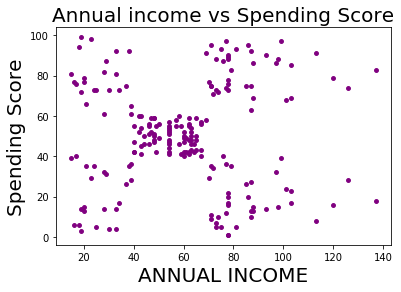

In [33]:
data = pd.read_csv("C:/Users/nobody/Downloads/Mall_Customers.csv")
X = data[["Annual Income (k$)","Spending Score (1-100)"]]
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], color='purple',s=15)
plt.xlabel('ANNUAL INCOME',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.title('Annual income vs Spending Score',fontsize=20)
plt.show()

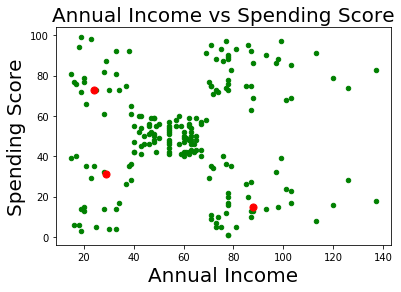

In [40]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='green',s=20)
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='red',s=50)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.title('Annual Income vs Spending Score',fontsize=20)
plt.show()

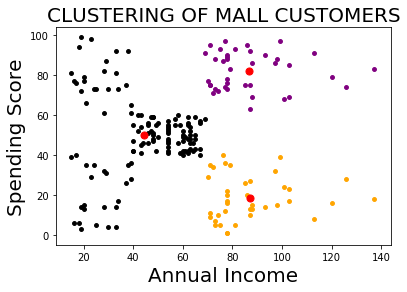

In [29]:
diff = 1
j=0
while(diff!=0):
    XD=X
    i=1
    for index_1,row_c in Centroids.iterrows():
        ED=[]
        for index_2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    Cluster=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        Cluster.append(pos)
    X["Cluster"]=Cluster
   
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
#         print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
color=['black','purple','orange']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k],s=15)
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='red',s=50)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.title('CLUSTERING OF MALL CUSTOMERS',fontsize=20)
plt.show()